# Leagues Comparison

In [11]:
'''
Let's start by importing the datasets and the important libraries
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import networkx as nx
from collections import Counter

data_partite = pd.read_csv("data_1/data_matches.csv", encoding='utf-8-sig')
campionati = pd.read_csv("data_1/League_Clubs.csv", encoding='utf-8-sig')

In [12]:
def transformation(dataset, column, retain, new_col_names):
    new_data = dataset.merge(campionati, left_on= column, right_on = "Club", how='outer').fillna(0)
    new_data = new_data[(new_data['League'] != 0) & (new_data[column] != 0)]
    new_data = new_data[retain]
    new_data.columns = new_col_names
    new_data['DR'] = new_data['DR'].apply(lambda x: int(x))
    new_data = new_data.reset_index()
    new_data = new_data.drop(['index'],axis = 1)
    return new_data

df3 = transformation(data_partite, 'Home_Team', ["League","Away_Team","Winner","DR"], ['Home_Team',"Away_Team","Winner","DR"])
df4 = transformation(df3, "Away_Team", ["Home_Team","League","Winner","DR"], ['Home_Team',"Away_Team","Winner","DR"])
df5 = transformation(df4, "Winner", ["Home_Team","Away_Team","League","DR"], ['Home_League',"Away_League","Winner","DR"])

df5 = df5[df5["Home_League"] != df5["Away_League"]]
df5 = df5.reset_index()
df5 = df5.drop(['index'],axis = 1)

In [13]:
listone = [(df5['Home_League'][i], df5['Away_League'][i]) for i in range(len(df5))]
hh = Counter(listone).most_common()

nuova_lista = {}

for i in range(len(hh)):
    if (hh[i][0] not in nuova_lista.keys()) & ((hh[i][0][1], hh[i][0][0]) not in nuova_lista.keys()):
        nuova_lista[hh[i][0]] = hh[i][1]
    elif (hh[i][0] not in nuova_lista.keys()) & ((hh[i][0][1], hh[i][0][0]) in nuova_lista.keys()):
        nuova_lista[(hh[i][0][1], hh[i][0][0])] += hh[i][1]
    elif (hh[i][0] in nuova_lista.keys()) & ((hh[i][0][1], hh[i][0][0]) in nuova_lista.keys()):
        nuova_lista[hh[i][0]] += hh[i][1]

In [14]:
df_a = pd.DataFrame(index = df5.Home_League.unique(),columns = df5.Home_League.unique())
df_a = df_a.fillna(0)

nazioni = df5.Home_League.unique()

for i in range(len(df5)):
    a = Counter(df5.iloc[i][:3].values)
    rev = {v: k for k, v in a.items()}
    loser = rev[1]
    if df5.iloc[i]['Home_League'] == loser:
        df_a[df5.iloc[i]['Winner']][loser] += df5.iloc[i][3]*2
    else:
        df_a[df5.iloc[i]['Winner']][loser] += df5.iloc[i][3]
    
for i in range(len(list(nuova_lista.keys()))):
    df_a.loc[list(nuova_lista.keys())[i][0],list(nuova_lista.keys())[i][1]] /= nuova_lista[list(nuova_lista.keys())[i]]
    df_a.loc[list(nuova_lista.keys())[i][1],list(nuova_lista.keys())[i][0]] /= nuova_lista[list(nuova_lista.keys())[i]]
    
v = pd.DataFrame(columns = ['vincente',"perdente","di quanto"])
for k in range(len(df_a)):
    for j in range(len(df_a)):
        v = v.append({'vincente': df_a.index[k],'perdente': df_a[df_a.index[k]].index[j],'di quanto':df_a[df_a.index[k]][j]}, ignore_index = True)
        
v = v[v['vincente'] != v['perdente']]

In [17]:
tuples

[('Ligue 1', 'Swiss Super League', 0.25),
 ('Premier League', 'Swiss Super League', 0.4583333333333333),
 ('Cypro League', 'Swiss Super League', 1.0),
 ('Serie A', 'Swiss Super League', 0.7916666666666666),
 ('Fußball-Bundesliga', 'Swiss Super League', 0.8947368421052632),
 ('Superliga', 'Swiss Super League', 1.1111111111111112),
 ('Divizia Nasional', 'Swiss Super League', 3.5),
 ('Croatian First Football League', 'Swiss Super League', 0.8),
 ('Ukrainian Premier League', 'Swiss Super League', 0.6666666666666666),
 ('Dutch Eredivisie', 'Swiss Super League', 1.1),
 ('Czech First League', 'Swiss Super League', 0.4444444444444444),
 ('Allsvenskan', 'Swiss Super League', 0.75),
 ('Süper Lig', 'Swiss Super League', 1.5),
 ('Belgian First Division A', 'Swiss Super League', 0.6666666666666666),
 ('First Professional Football League', 'Swiss Super League', 2.3),
 ('Primeira Liga', 'Swiss Super League', 1.1428571428571428),
 ('La Liga', 'Swiss Super League', 0.6086956521739131),
 ('Russian Premi

In [16]:
a = list(set([i for i in v['vincente']]))
b = list(set([i for i in v['perdente']]))
c = list(set(a+b))
subset = v[['perdente', 'vincente','di quanto']]
tuples = [tuple(x) for x in subset.to_numpy()]
tuples = [x for x in tuples if x[2] != 0] 

G = nx.DiGraph()
G.add_nodes_from(c)
G.add_weighted_edges_from(tuples)
G.in_edges(data=True)

InEdgeDataView([('Swiss Super League', 'Belgian First Division A', {'weight': 0.6666666666666666}), ('Ligue 1', 'Belgian First Division A', {'weight': 0.5714285714285714}), ('Premier League', 'Belgian First Division A', {'weight': 0.19230769230769232}), ('Cypro League', 'Belgian First Division A', {'weight': 1.6666666666666667}), ('Serie A', 'Belgian First Division A', {'weight': 0.5714285714285714}), ('Fußball-Bundesliga', 'Belgian First Division A', {'weight': 0.6896551724137931}), ('Superliga', 'Belgian First Division A', {'weight': 2.6153846153846154}), ('Croatian First Football League', 'Belgian First Division A', {'weight': 0.8}), ('Ukrainian Premier League', 'Belgian First Division A', {'weight': 0.7333333333333333}), ('Dutch Eredivisie', 'Belgian First Division A', {'weight': 0.9333333333333333}), ('Allsvenskan', 'Belgian First Division A', {'weight': 1.8}), ('Süper Lig', 'Belgian First Division A', {'weight': 1.6923076923076923}), ('First Professional Football League', 'Belgia

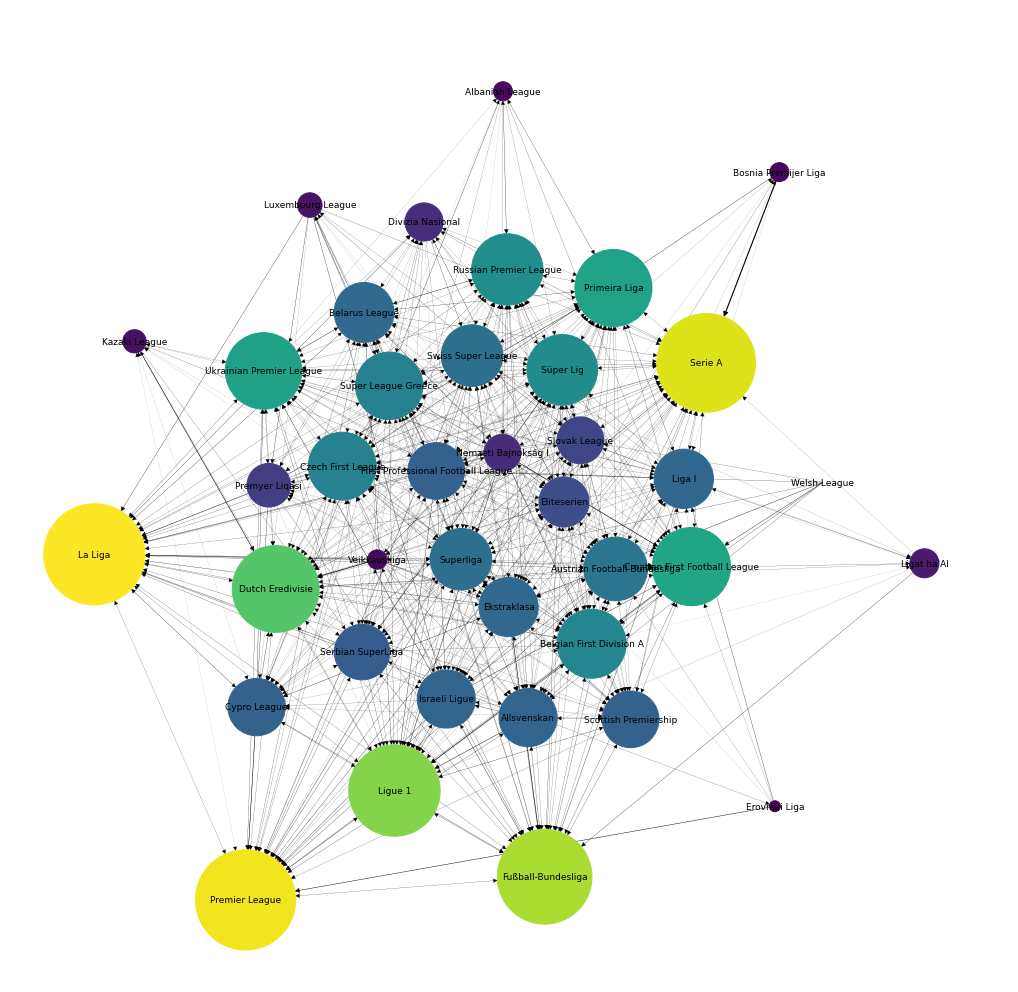

In [7]:
pos = nx.spring_layout(G, weight = 'weight', iterations=50000, threshold=0.000001)

node_size = [120 * G.in_degree(i) * np.mean([k[2]['weight'] for k in list(G.in_edges(i,data = True))]) for i in G]
node_color = [50 * G.in_degree(i) * np.mean([k[2]['weight'] for k in list(G.in_edges(i,data = True))]) for i in G]
weights = [G[i][j]['weight'] * 0.07 for i,j in G.edges()]

plt.figure(figsize = (18,18))
           
nx.draw_networkx(G, 
                 pos,
                 with_labels = False,
                 node_color = node_color,
                 node_size = node_size, 
                 width = weights)

nx.draw_networkx_labels(G, pos = pos, font_color = "black", font_size = 9)

plt.box(on = None)
plt.axis('off')

plt.show()

In [8]:
lista_j = [[i, np.mean([k[2]['weight'] for k in list(G.in_edges(i,data = True))])] for i in G]
lista_j = [j for j in lista_j if ~np.isnan(j[1])]

X = [np.mean([k[2]['weight'] for k in list(G.in_edges(i,data = True))]) for i in G]
X = [j for j in X if ~np.isnan(j)]

scaled_x = [i/max(X) for i in X]

y = [[lista_j[i][0], scaled_x[i]] for i in range(len(lista_j))]

diz={}

for i in range(len(y)):
    diz[y[i][0]] = y[i][1]
    
diz = {k: v for k, v in sorted(diz.items(), key=lambda item: item[1], reverse=True)}
diz

{'La Liga': 1.0,
 'Premier League': 0.9487919879495791,
 'Serie A': 0.8920246946045273,
 'Fußball-Bundesliga': 0.875552933748808,
 'Ligue 1': 0.8437072353220335,
 'Dutch Eredivisie': 0.7120880652853522,
 'Croatian First Football League': 0.660113198874628,
 'Ukrainian Premier League': 0.6565122266468116,
 'Primeira Liga': 0.59938549048005,
 'Russian Premier League': 0.5925905662765146,
 'Süper Lig': 0.5393529751443783,
 'Liga I': 0.5326268181591883,
 'Cypro League': 0.5241991085798895,
 'Premyer Liqasi': 0.5238887871431379,
 "Ligat ha'Al": 0.5084802934036338,
 'Belgian First Division A': 0.49651726321947476,
 'First Professional Football League': 0.4872464456534295,
 'Israeli Ligue': 0.48643490786719795,
 'Czech First League': 0.48113901816266597,
 'Super League Greece': 0.47465520923887305,
 'Belarus League': 0.471333108407864,
 'Luxembourg League': 0.4540002619675302,
 'Ekstraklasa': 0.44059367303507024,
 'Austrian Football Bundesliga': 0.43748994999047425,
 'Allsvenskan': 0.42588565

In [9]:
second_ranking = pd.read_csv('data_1/SPI_Index.csv')

diz2={}

for i in range(len(second_ranking)):
    diz2[second_ranking['League'][i]] = second_ranking['Average SPI'][i]
    
diz2

{'Premier League': 1.0,
 'La Liga': 0.9560049187047412,
 'Fußball-Bundesliga': 0.946030878535319,
 'Serie A': 0.8768957507856265,
 'Ligue 1': 0.8308512091815823,
 'Primeira Liga': 0.7148517557043312,
 'Dutch Eredivisie': 0.7037846700368903,
 'Brasileiro Série A': 0.6738625495286241,
 'Mexican Primera Division Torneo Clausura': 0.648175980325181,
 'Russian Premier League': 0.6249487634922805,
 'English League Championship': 0.6024047000956415,
 'Austrian Football Bundesliga': 0.5916108758027052,
 'Belgian First Division A': 0.5849159721273398,
 'Süper Lig': 0.5452930728241563,
 'Swiss Super League': 0.5406476294575762,
 'Superliga': 0.5388714305232956,
 'MLS': 0.5381882770870338,
 'Argentina Primera Division': 0.5310834813499111,
 'Scottish Premiership': 0.5239786856127887,
 'Japanese J League': 0.4843557863096052,
 'German 2. Bundesliga': 0.4827162180625768,
 'Super League Greece': 0.4683699959010794,
 'Eliteserien': 0.4499248531220112,
 'Italy Serie B': 0.4361251537095232,
 'Spanish S

In [10]:
nuovo1 = pd.DataFrame.from_dict(diz, orient='index')
nuovo1 = nuovo1.reset_index()
nuovo2 = pd.DataFrame.from_dict(diz2, orient='index')
nuovo2 = nuovo2.reset_index()
nuovo3 = pd.merge(nuovo1, nuovo2, on = "index")
nuovo3.columns = ["League","Graph Index", "SPI Index"]

nuovo3['Tot Index'] = (nuovo3['SPI Index'] + nuovo3['Graph Index'])

scaled_tot = [i/nuovo3['Tot Index'].max() for i in nuovo3['Tot Index']]

y = [[nuovo3['League'][i], scaled_tot[i]] for i in range(len(nuovo3['League']))]

diz3 = {}

for i in range(len(y)):
    diz3[y[i][0]] = y[i][1]
    
diz3 = dict(Counter(diz3).most_common(5))
pd.DataFrame(list(zip(list(diz3.keys()),list(diz3.values()))), columns =['League', 'Difficulty_Index']).to_csv("Difficulty_Index.csv", index = False, encoding='utf-8-sig')

diz3

{'La Liga': 1.0,
 'Premier League': 0.9963124168624593,
 'Fußball-Bundesliga': 0.9312777257688967,
 'Serie A': 0.9043537817693863,
 'Ligue 1': 0.8561115713412939}